<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/Trip_After_Sir_idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:

df = pd.read_csv('/content/taxi_fare_Download.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [275]:
df.shape
# --------------------------
# 2. Structure & Schema
# --------------------------
print("--- Structure ---")
print(df.info())

print("\n--- Shape --- ")
print(df.shape)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())

--- Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount        

In [276]:

def haversine_distance(lat1, lon1, lat2, lon2, unit="km"):
    R_km = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance_km = R_km * c

    if unit.lower() == "miles":
        return distance_km * 0.621371
    return distance_km

# For miles
df["trip_distance_miles"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"],
    unit="miles"
)

df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

df['Duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

df['Duration'] = df['Duration'].dt.total_seconds()/60 # In minutes
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Duration']].head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               212345 non-null  int64         
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]
 3   passenger_count        212345 non-null  int64         
 4   pickup_longitude       212345 non-null  float64       
 5   pickup_latitude        212345 non-null  float64       
 6   RatecodeID             212345 non-null  int64         
 7   store_and_fwd_flag     212345 non-null  object        
 8   dropoff_longitude      212345 non-null  float64       
 9   dropoff_latitude       212345 non-null  float64       
 10  payment_type           212345 non-null  int64         
 11  fare_amount            212345 non-null  float64       
 12  extra                  212345 non-null  floa

In [277]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_miles,Duration
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,1.949922,7.916667
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2.673965,11.100000
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,10.314847,31.100000
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,5.621262,0.000000
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,12.675982,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,2.365112,23.266667
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,2.172671,22.750000
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.360469,2.683333
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,0.966690,7.150000


In [278]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_miles', 'Duration'],
      dtype='object')

In [279]:
# List of specific numeric columns
numeric_cols_abs = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']

# Convert them to absolute values
df[numeric_cols_abs] = df[numeric_cols_abs].abs()

In [280]:
# Drop rows where fare_amount == 0

df = df[df['fare_amount'] > 0]

# Remove them
df = df[df['passenger_count'] > 0]

# Replace 0 with mean value
df['improvement_surcharge'] = df['improvement_surcharge'].replace(0, df['improvement_surcharge'].mean())

In [281]:
# Calculate the expected total
df['calculated_total'] = (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge']
)

# Find mismatches (allowing for floating-point tolerance)
mismatched_rows = df[~np.isclose(df['calculated_total'], df['total_amount'])]

# Store to CSV
mismatched_rows.to_csv("mismatched_rows.csv", index=False)

# Display all mismatches
print("Total mismatches found:", len(mismatched_rows))
print(mismatched_rows.to_string(index=False))

Total mismatches found: 116
 VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  pickup_longitude  pickup_latitude  RatecodeID store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  trip_distance_miles   Duration  calculated_total
        2  2016-03-10 07:08:46   2016-03-10 07:14:05                1        -73.957062        40.802132           1                  N         -73.948380         40.803150             3         5.50    0.0      0.5        0.00           0.0               0.300000         -6.30             0.459513   5.316667          6.300000
        2  2016-03-10 07:13:33   2016-03-10 08:44:31                1        -73.783577        40.646389           1                  N         -74.004929         40.725491             3         2.50    0.0      0.5        0.00           0.0               0.300000         -3.30            12.820587  90.966667    

In [282]:
# Replace total_amount with calculated_total

df['total_amount'] = df['calculated_total']

In [283]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_miles', 'Duration', 'calculated_total'],
      dtype='object')

In [284]:
# Drop the columns

df = df.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
'pickup_longitude', 'pickup_latitude', 'RatecodeID','dropoff_longitude', 'dropoff_latitude','calculated_total'])


In [285]:
df.columns

Index(['passenger_count', 'store_and_fwd_flag', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_miles',
       'Duration'],
      dtype='object')

In [286]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
passenger_count                 0               0
payment_type                    0               0
fare_amount                     0               0
extra                      191874               0
mta_tax                       741               0
tip_amount                  73487               0
tolls_amount               200675               0
improvement_surcharge           0               0
total_amount                    0               0
trip_distance_miles          2975               0
Duration                      126               1


In [287]:
# ---- Trip distance ----
# Keep only trip distances > 0 and <= 50, else set NaN
df.loc[(df['trip_distance_miles'] <= 0) | (df['trip_distance_miles'] > 50), 'trip_distance_miles'] = np.nan

# ---- Trip duration ----
df.loc[(df['Duration'] <= 0) | (df['Duration'] > 300), 'Duration'] = np.nan

In [288]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)


                       Zero_Count  Negative_Count
passenger_count                 0               0
payment_type                    0               0
fare_amount                     0               0
extra                      191874               0
mta_tax                       741               0
tip_amount                  73487               0
tolls_amount               200675               0
improvement_surcharge           0               0
total_amount                    0               0
trip_distance_miles             0               0
Duration                        0               0


In [289]:
df.dtypes

,0
passenger_count,int64
store_and_fwd_flag,object
payment_type,int64
fare_amount,float64
extra,float64
mta_tax,float64
tip_amount,float64
tolls_amount,float64
improvement_surcharge,float64
total_amount,float64


In [290]:
df

,passenger_count,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_miles,Duration
0,1,N,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,1.949922,7.916667
1,1,N,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2.673965,11.100000
2,2,N,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,10.314847,31.100000
3,3,N,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,5.621262,NaN
4,5,N,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,12.675982,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
212340,1,N,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,2.365112,23.266667
212341,1,N,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,2.172671,22.750000
212342,1,N,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.360469,2.683333
212343,2,N,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,0.966690,7.150000


In [291]:
df.duplicated().sum()

np.int64(195)

In [292]:
df.drop_duplicates(inplace=True)

In [293]:
df.isna().sum()

,0
passenger_count,0
store_and_fwd_flag,0
payment_type,0
fare_amount,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0
improvement_surcharge,0
total_amount,0


In [294]:
df.dropna(inplace=True)

In [295]:
df.shape

(208446, 12)

In [296]:
# Optional: reset index after dropping duplicates
df = df.reset_index(drop=True)

In [297]:
df

,passenger_count,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_miles,Duration
0,1,N,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,1.949922,7.916667
1,1,N,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,2.673965,11.100000
2,2,N,1,54.5,0.5,0.5,8.00,0.0,0.3,63.80,10.314847,31.100000
3,1,N,3,20.5,0.5,0.5,0.00,0.0,0.3,21.80,4.939940,16.050000
4,1,N,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80,0.520333,4.983333
...,...,...,...,...,...,...,...,...,...,...,...,...
208441,1,N,1,16.0,0.0,0.5,3.36,0.0,0.3,20.16,2.365112,23.266667
208442,1,N,1,15.5,0.0,0.5,2.00,0.0,0.3,18.30,2.172671,22.750000
208443,1,N,1,4.0,0.0,0.5,0.00,0.0,0.3,4.80,0.360469,2.683333
208444,2,N,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.966690,7.150000


# **Divide into two parts (Model1 and Model2)**

In [298]:
df.columns

Index(['passenger_count', 'store_and_fwd_flag', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_miles',
       'Duration'],
      dtype='object')

In [299]:
df_model1 = df[['passenger_count','store_and_fwd_flag','payment_type','trip_distance_miles','Duration','fare_amount']]

df_model2 = df[['fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'total_amount']]

In [300]:
df_model1.head()

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_amount
0,1,N,1,1.949922,7.916667,9.0
1,1,N,1,2.673965,11.100000,11.0
2,2,N,1,10.314847,31.100000,54.5
3,1,N,3,4.939940,16.050000,20.5
4,1,N,1,0.520333,4.983333,5.5


In [301]:
df_model2.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
2,54.5,0.5,0.5,8.00,0.0,0.3,63.80
3,20.5,0.5,0.5,0.00,0.0,0.3,21.80
4,5.5,0.5,0.5,2.00,0.0,0.3,8.80


In [302]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df_model1.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                     Zero_Count  Negative_Count
passenger_count               0               0
payment_type                  0               0
trip_distance_miles           0               0
Duration                      0               0
fare_amount                   0               0


In [303]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df_model2.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
fare_amount                     0               0
extra                      188427               0
mta_tax                       623               0
tip_amount                  71826               0
tolls_amount               197052               0
improvement_surcharge           0               0
total_amount                    0               0


# **Analyize df_model1**

In [304]:
df_model1

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_amount
0,1,N,1,1.949922,7.916667,9.0
1,1,N,1,2.673965,11.100000,11.0
2,2,N,1,10.314847,31.100000,54.5
3,1,N,3,4.939940,16.050000,20.5
4,1,N,1,0.520333,4.983333,5.5
...,...,...,...,...,...,...
208441,1,N,1,2.365112,23.266667,16.0
208442,1,N,1,2.172671,22.750000,15.5
208443,1,N,1,0.360469,2.683333,4.0
208444,2,N,2,0.966690,7.150000,7.0


In [305]:
(df_model1['passenger_count'].value_counts(normalize=True))*100

,proportion
passenger_count,
1,70.480604
2,12.440152
5,7.048828
6,4.880880
3,3.560155
4,1.589380


In [306]:
(df_model1['payment_type'].value_counts(normalize=True))*100

,proportion
payment_type,
1,68.020974
2,31.709412
3,0.187099
4,0.082515


In [307]:
df_model1=df_model1[df_model1['payment_type']<3]

In [308]:
df_model1.shape

(207884, 6)

In [309]:
df_model1['payment_type'].replace([1,2,3],['Card','Cash',"other"],inplace=True)

/tmp/ipython-input-3085161422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model1['payment_type'].replace([1,2,3],['Card','Cash',"other"],inplace=True)
/tmp/ipython-input-3085161422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1['payment_type'].replace([1,2,3],['Card','Cash',"other"],inplace=True)


In [310]:
df_model1

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_amount
0,1,N,Card,1.949922,7.916667,9.0
1,1,N,Card,2.673965,11.100000,11.0
2,2,N,Card,10.314847,31.100000,54.5
4,1,N,Card,0.520333,4.983333,5.5
5,3,N,Card,4.426843,24.083333,23.5
...,...,...,...,...,...,...
208441,1,N,Card,2.365112,23.266667,16.0
208442,1,N,Card,2.172671,22.750000,15.5
208443,1,N,Card,0.360469,2.683333,4.0
208444,2,N,Cash,0.966690,7.150000,7.0


In [311]:
df_model1.describe()

,passenger_count,trip_distance_miles,Duration,fare_amount
count,207884.000000,207884.000000,207884.000000,207884.000000
mean,1.770507,2.007240,14.195451,12.634913
std,1.472794,2.313810,10.966257,10.444039
min,1.000000,0.000264,0.016667,0.010000
25%,1.000000,0.735253,6.766667,6.500000
50%,1.000000,1.219701,11.300000,9.500000
75%,2.000000,2.226859,18.300000,14.500000
max,6.000000,44.840623,253.983333,490.000000


In [312]:
df_model1.dtypes

,0
passenger_count,int64
store_and_fwd_flag,object
payment_type,object
trip_distance_miles,float64
Duration,float64
fare_amount,float64


In [313]:
df_model1["passenger_count"] = df_model1["passenger_count"].astype("object")

/tmp/ipython-input-356912835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1["passenger_count"] = df_model1["passenger_count"].astype("object")


**Outlier Handle**

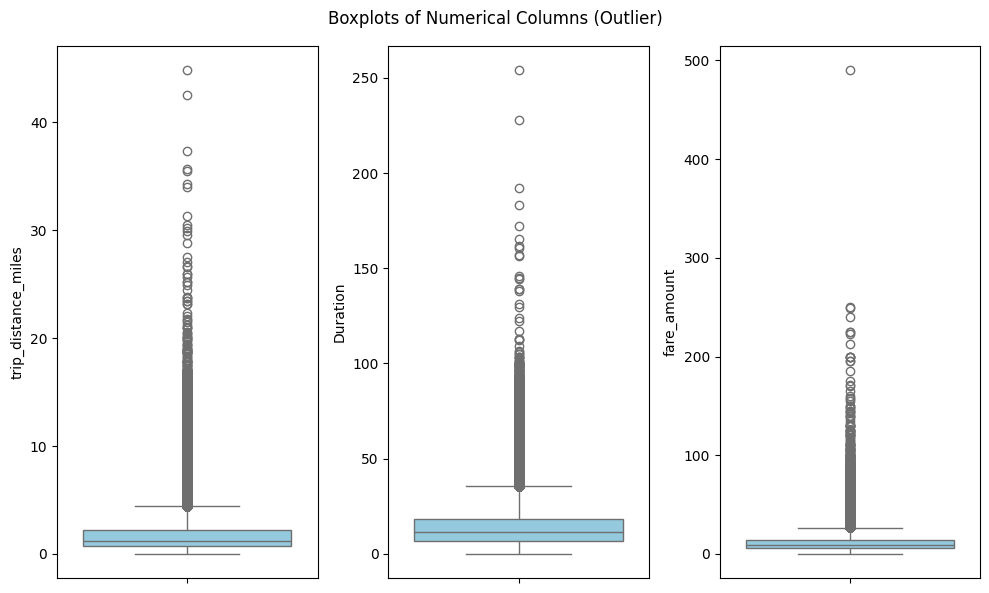

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_model1.select_dtypes(exclude='object').columns

# Loop through numerical columns and create boxplots

plt.figure(figsize=(10, 6))
plt.suptitle('Boxplots of Numerical Columns (Outlier)')
for i in range(0, len(numerical_cols)):  # Limit to a maximum of 4 columns
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()
plt.show()

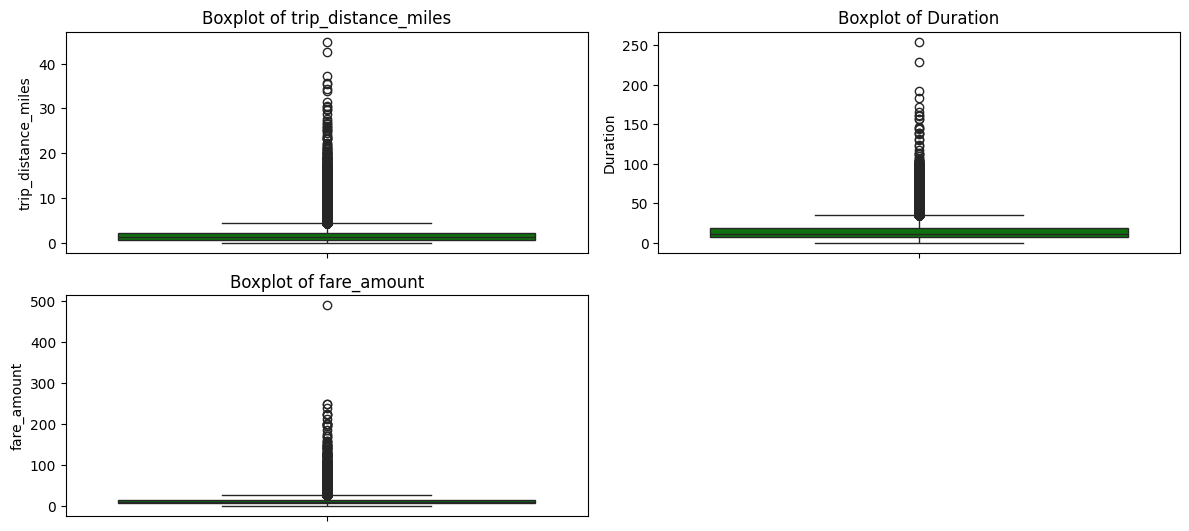

In [315]:
plt.figure(figsize=(12, 8)) # size figure
# loop over each columns
numerical_cols = df_model1.select_dtypes(include=np.number).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df_model1[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Passenger Count**: IQR 1–2 passengers, outliers above 3, most trips have 1–2 passengers.

**Trip Distance**: IQR 0.5–2 miles, median ~1 mile, outliers beyond 4 miles, mostly short trips.

**Fare Amount**: IQR
5 – 15, median ~ 10 , outliers above 30, most fares are moderate.

**Duration**: IQR 5–15 minutes, median ~10 minutes, outliers past 25 minutes, mostly short trips.

In [316]:
numerical_cols = ['trip_distance_miles', 'fare_amount', 'Duration']
def cap_outliers_iqr(df_model1, column):
    Q1 = df_model1[column].quantile(0.25) # get q1
    Q3 = df_model1[column].quantile(0.75) # get q3
    IQR = Q3 - Q1  # inter quartile range
    lower_bound = Q1 - 1.5 * IQR  # for upper outliers
    upper_bound = Q3 + 1.5 * IQR  # for lower outliers

    # clipping outliers -> if X < lower_bound set X = lower_bound & if X > upper_bound set X = upper_bound
    df_model1[column] = df_model1[column].clip(lower=lower_bound, upper=upper_bound)
    return df_model1

# Apply Outliers On Data
for col in numerical_cols:
    df_model1 = cap_outliers_iqr(df_model1, col)

/tmp/ipython-input-3012049023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1[column] = df_model1[column].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipython-input-3012049023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1[column] = df_model1[column].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipython-input-3012049023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [317]:
df_model1.shape

(207884, 6)

In [318]:
df_model1

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_amount
0,1,N,Card,1.949922,7.916667,9.0
1,1,N,Card,2.673965,11.100000,11.0
2,2,N,Card,4.464268,31.100000,26.5
4,1,N,Card,0.520333,4.983333,5.5
5,3,N,Card,4.426843,24.083333,23.5
...,...,...,...,...,...,...
208441,1,N,Card,2.365112,23.266667,16.0
208442,1,N,Card,2.172671,22.750000,15.5
208443,1,N,Card,0.360469,2.683333,4.0
208444,2,N,Cash,0.966690,7.150000,7.0


In [319]:
# --------------------------
#  Distribution & Skewness
# --------------------------

# Step 1: Select numeric columns
numeric_cols = df_model1.select_dtypes(include=np.number).columns

# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df_model1[col].skew()
    kurt_val = df_model1[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: trip_distance_miles
  Skewness: 1.097
  Kurtosis: 0.009
  ⚠ Not normal (may need transformation)

Column: Duration
  Skewness: 0.961
  Kurtosis: 0.152
  ⚠ Not normal (may need transformation)

Column: fare_amount
  Skewness: 1.081
  Kurtosis: 0.155
  ⚠ Not normal (may need transformation)


In [320]:
# Transformation

from scipy.stats import boxcox

# Methods (lambda values for Box-Cox)
methods = [0, 0.5, -0.5, -1, 1, 2, -2]

# Loop through numeric columns
numeric_cols = df_model1.select_dtypes(include=np.number).columns

for col in numeric_cols:
    print(f"\n=== Column: {col} ===")

    # Box-Cox requires positive values
    if (df_model1[col] <= 0).any():
        print("❌ Skipped (contains zero or negative values)")
        continue

    for j in methods:
        # Apply Box-Cox
        transformed = boxcox(df_model1[col], lmbda=j)

        # Calculate skewness and kurtosis
        skew_val = pd.Series(transformed).skew()
        kurt_val = pd.Series(transformed).kurtosis()

        print(f"λ = {j}:  skew = {skew_val:.3f}, kurtosis = {kurt_val:.3f}")


=== Column: trip_distance_miles ===
λ = 0:  skew = -0.938, kurtosis = 5.799
λ = 0.5:  skew = 0.590, kurtosis = -0.560
λ = -0.5:  skew = -28.926, kurtosis = 1179.331
λ = -1:  skew = -63.814, kurtosis = 4874.700
λ = 1:  skew = 1.097, kurtosis = 0.009
λ = 2:  skew = 1.669, kurtosis = 1.351
λ = -2:  skew = -101.657, kurtosis = 11348.125

=== Column: Duration ===
λ = 0:  skew = -0.650, kurtosis = 1.439
λ = 0.5:  skew = 0.351, kurtosis = -0.532
λ = -0.5:  skew = -8.896, kurtosis = 228.006
λ = -1:  skew = -68.140, kurtosis = 6948.917
λ = 1:  skew = 0.961, kurtosis = 0.152
λ = 2:  skew = 1.831, kurtosis = 2.553
λ = -2:  skew = -177.851, kurtosis = 35774.681

=== Column: fare_amount ===
λ = 0:  skew = 0.149, kurtosis = 0.006
λ = 0.5:  skew = 0.677, kurtosis = -0.449
λ = -0.5:  skew = -24.941, kurtosis = 2344.745
λ = -1:  skew = -182.466, kurtosis = 33735.343
λ = 1:  skew = 1.081, kurtosis = 0.155
λ = 2:  skew = 1.679, kurtosis = 1.617
λ = -2:  skew = -186.131, kurtosis = 34643.084


In [321]:
# df_model1["fare_amount"] = boxcox(df_model1["fare_amount"], lmbda=0)
# df_model1["trip_distance_miles"] = boxcox(df_model1["trip_distance_miles"], lmbda=0.5)
# df_model1["Duration"] = boxcox(df_model1["Duration"], lmbda=0.5)


In [322]:
# Feature Engineering

# Creat New Feature Name fare_per_mile
df_model1['fare_per_mile'] = df_model1['fare_amount'] / (df_model1['trip_distance_miles'] + 0.01)

# Bin duration into categories: short (0–10 mins), medium (10–20 mins), long (>20 mins)
df_model1['duration_bin'] = pd.cut(df_model1['Duration'], bins=[0, 10, 20, float('inf')], labels=['short', 'medium', 'long'], include_lowest=True)

/tmp/ipython-input-3667302277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1['fare_per_mile'] = df_model1['fare_amount'] / (df_model1['trip_distance_miles'] + 0.01)
/tmp/ipython-input-3667302277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1['duration_bin'] = pd.cut(df_model1['Duration'], bins=[0, 10, 20, float('inf')], labels=['short', 'medium', 'long'], include_lowest=True)


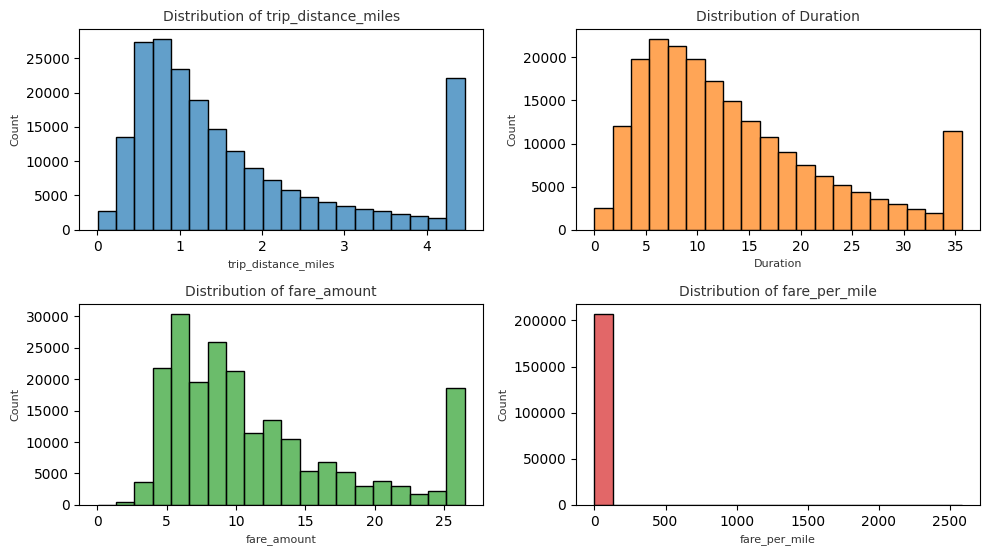

In [323]:
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown

plt.figure(figsize=(10, 8)) # size figure

# loop over each column to draw
numerical_cols = df_model1.select_dtypes(include=np.number).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)  # (row, col, #plot) - Changed to 3 rows to accommodate all columns
    sns.histplot(df_model1[col], bins=20, color=colors[i], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()

**Passenger Count**: Heavily skewed; most trips have 1 passenger, solo rides dominate.

**Trip Distance**: Right-skewed; most trips are short (0–2 miles), longer trips are rare.

**Fare Amount**: Right-skewed; most fares are
5 – 15, higher fares are uncommon.

**Duration**: Right-skewed; most trips last 0–15 minutes, longer durations are less frequent.

/tmp/ipython-input-3342487464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df_model1, palette=colors, alpha=0.8)
/tmp/ipython-input-3342487464.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='payment_type', data=df_model1, palette=colors, alpha=0.8)


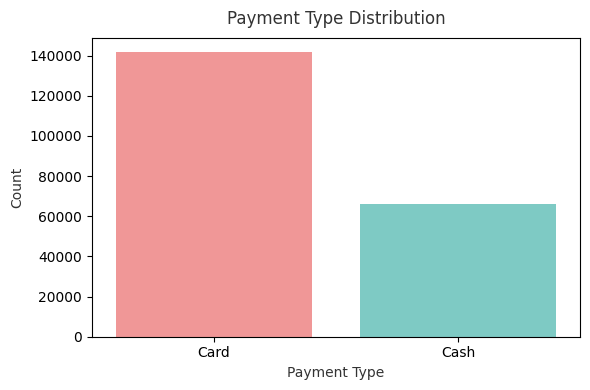

In [324]:
plt.figure(figsize=(6, 4)) # size figure

# define some color to use
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Coral, Teal, Blue, Green, Light Yellow
sns.countplot(x='payment_type', data=df_model1, palette=colors, alpha=0.8)

plt.title('Payment Type Distribution', fontsize=12, color='#333333', pad=10)
plt.xlabel('Payment Type', fontsize=10, color='#333333')
plt.ylabel('Count', fontsize=10, color='#333333')
plt.tight_layout()
plt.show()

**Card Payments**: Dominant method, ~6 million trips.

**Cash Payments**: Much less common, ~1 million trips.

**Comparison**: Card payments are ~6x more frequent than cash, showing a preference for digital transactions

/tmp/ipython-input-3921735403.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_model1['fare_amount'], shade=True, color='#FF6B6B')


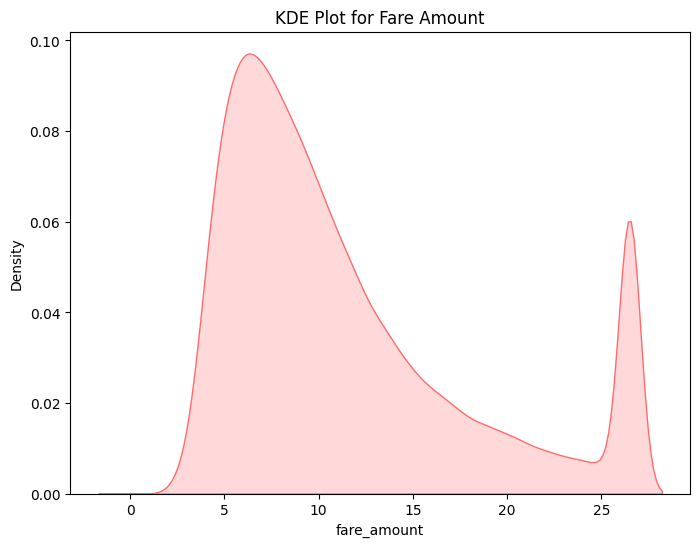

In [325]:
plt.figure(figsize=(8, 6)) # fig size
sns.kdeplot(df_model1['fare_amount'], shade=True, color='#FF6B6B')
plt.title('KDE Plot for Fare Amount')
plt.show()

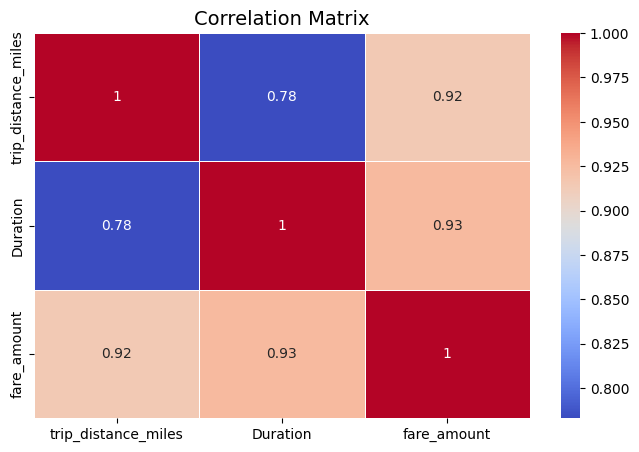

In [326]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_model1[['trip_distance_miles', 'Duration', 'fare_amount']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [327]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df_model1.select_dtypes(include="object").columns:
  df_model1[i] = code.fit_transform(df_model1[i])

/tmp/ipython-input-2458266751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1[i] = code.fit_transform(df_model1[i])
/tmp/ipython-input-2458266751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1[i] = code.fit_transform(df_model1[i])
/tmp/ipython-input-2458266751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

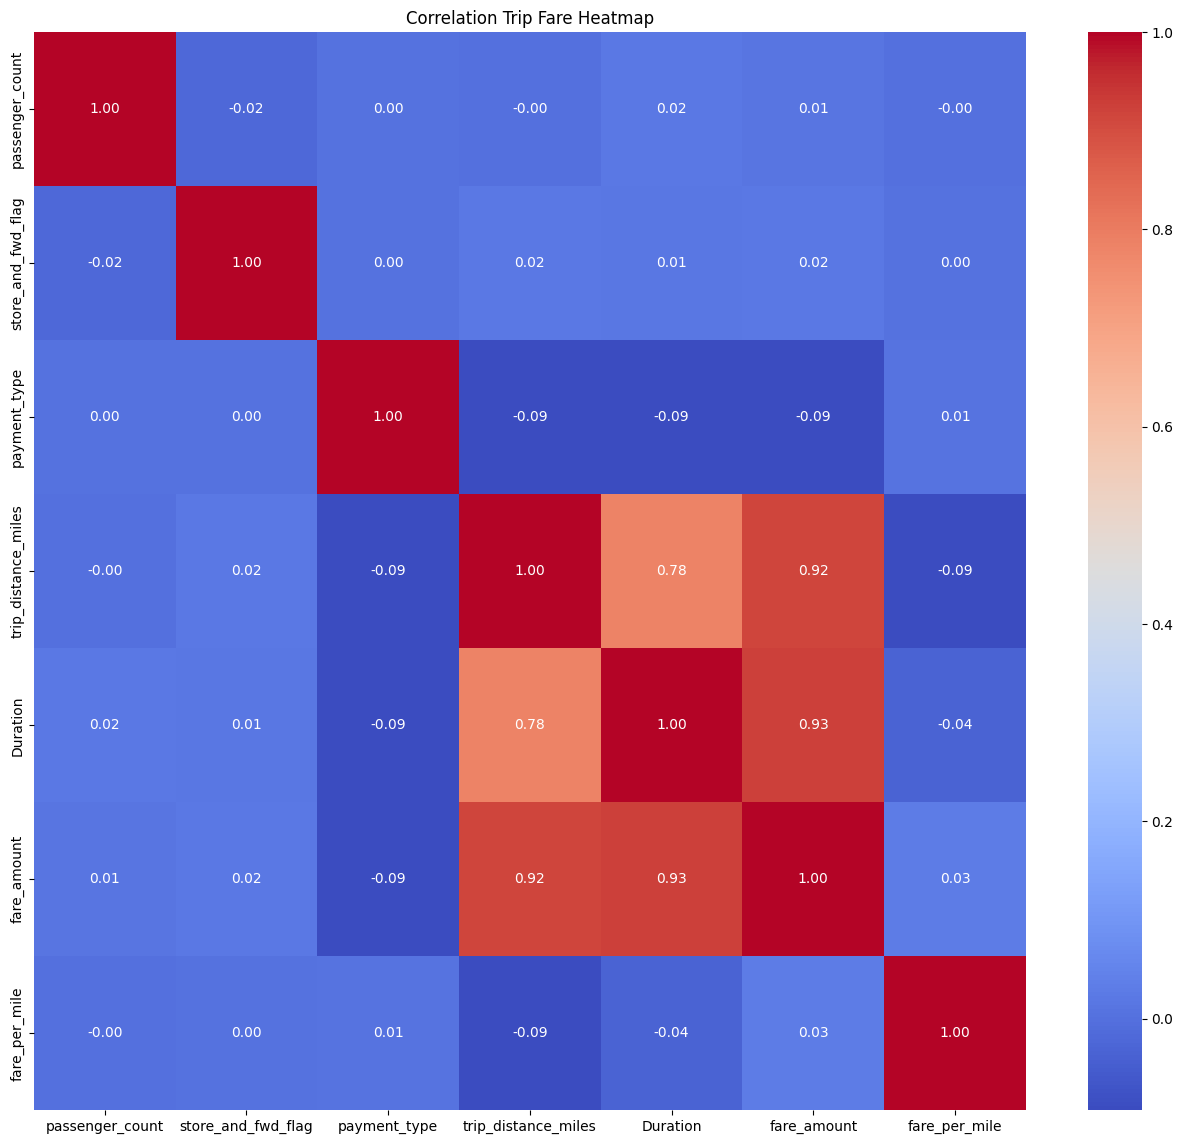

In [328]:
df_copy = df_model1.copy()

# Drop the non-numeric column 'duration_bin' before calculating correlation
df_copy = df_copy.drop(columns=['duration_bin'])


# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_copy.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()

In [329]:
df_model1

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_amount,fare_per_mile,duration_bin
0,0,0,0,1.949922,7.916667,9.0,4.592020,short
1,0,0,0,2.673965,11.100000,11.0,4.098414,medium
2,1,0,0,4.464268,31.100000,26.5,5.922757,long
4,0,0,0,0.520333,4.983333,5.5,10.370847,short
5,2,0,0,4.426843,24.083333,23.5,5.296559,long
...,...,...,...,...,...,...,...,...
208441,0,0,0,2.365112,23.266667,16.0,6.736525,long
208442,0,0,0,2.172671,22.750000,15.5,7.101391,long
208443,0,0,0,0.360469,2.683333,4.0,10.797117,short
208444,1,0,1,0.966690,7.150000,7.0,7.167067,short


# **Analyize df_model2**

In [330]:
df_model2

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
2,54.5,0.5,0.5,8.00,0.0,0.3,63.80
3,20.5,0.5,0.5,0.00,0.0,0.3,21.80
4,5.5,0.5,0.5,2.00,0.0,0.3,8.80
...,...,...,...,...,...,...,...
208441,16.0,0.0,0.5,3.36,0.0,0.3,20.16
208442,15.5,0.0,0.5,2.00,0.0,0.3,18.30
208443,4.0,0.0,0.5,0.00,0.0,0.3,4.80
208444,7.0,0.0,0.5,0.00,0.0,0.3,7.80


In [331]:
# Count zeros and negative values in each column

# Select only numeric columns
numeric_df = df_model2.select_dtypes(include=np.number)

# Count zeros in each column
zero_count = (numeric_df == 0).sum()

# Count negative values in each column
negative_count = (numeric_df < 0).sum()

# Combine results
result = pd.DataFrame({
    'Zero_Count': zero_count,
    'Negative_Count': negative_count
})

print(result)

                       Zero_Count  Negative_Count
fare_amount                     0               0
extra                      188427               0
mta_tax                       623               0
tip_amount                  71826               0
tolls_amount               197052               0
improvement_surcharge           0               0
total_amount                    0               0


In [332]:
df_model2.shape

(208446, 7)

In [333]:
df_model2.describe()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,208446.000000,208446.000000,208446.000000,208446.000000,208446.000000,2.084460e+05,208446.000000
mean,12.633784,0.048084,0.498506,1.808661,0.328574,3.000000e-01,15.617609
std,10.455071,0.147631,0.027294,2.476556,2.036182,6.823575e-08,13.225863
min,0.010000,0.000000,0.000000,0.000000,0.000000,2.999873e-01,0.310000
25%,6.500000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,8.300000
50%,9.500000,0.000000,0.500000,1.350000,0.000000,3.000000e-01,11.750000
75%,14.500000,0.000000,0.500000,2.360000,0.000000,3.000000e-01,17.160000
max,490.000000,1.000000,0.500000,218.950000,661.080000,3.000000e-01,677.880000


In [334]:
df_model2.dtypes

,0
fare_amount,float64
extra,float64
mta_tax,float64
tip_amount,float64
tolls_amount,float64
improvement_surcharge,float64
total_amount,float64


**Outlier Handle**

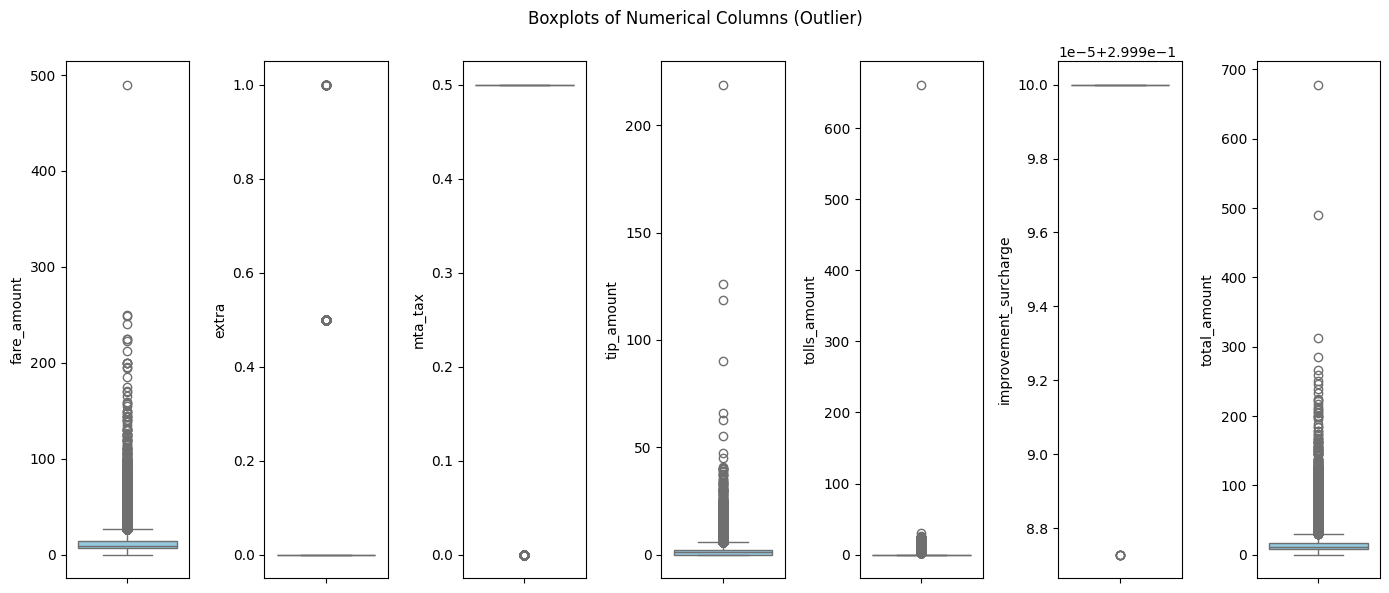

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_model2.select_dtypes(exclude='object').columns

# Loop through numerical columns and create boxplots

plt.figure(figsize=(14, 6))
plt.suptitle('Boxplots of Numerical Columns (Outlier)')
for i in range(0, len(numerical_cols)):  # Limit to a maximum of 4 columns
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='skyblue',)
    plt.tight_layout()
plt.show()

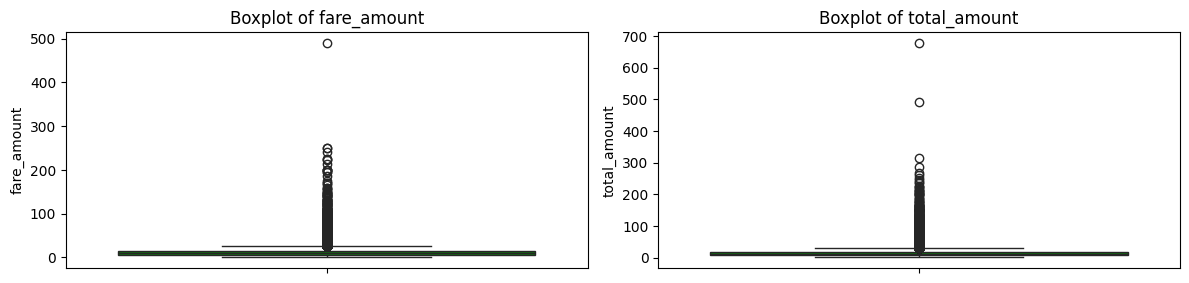

In [336]:
plt.figure(figsize=(12, 8)) # size figure
# loop over each columns
numerical_cols = ['fare_amount', 'total_amount']
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df_model2[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [337]:
numerical_cols = ['fare_amount', 'total_amount']
def cap_outliers_iqr(df_model2, column):
    Q1 = df_model2[column].quantile(0.25) # get q1
    Q3 = df_model2[column].quantile(0.75) # get q3
    IQR = Q3 - Q1  # inter quartile range
    lower_bound = Q1 - 1.5 * IQR  # for upper outliers
    upper_bound = Q3 + 1.5 * IQR  # for lower outliers

    # clipping outliers -> if X < lower_bound set X = lower_bound & if X > upper_bound set X = upper_bound
    df_model2[column] = df_model2[column].clip(lower=lower_bound, upper=upper_bound)
    return df_model2

# Apply Outliers On Data
for col in numerical_cols:
    df_model2 = cap_outliers_iqr(df_model2, col)

/tmp/ipython-input-1274155444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model2[column] = df_model2[column].clip(lower=lower_bound, upper=upper_bound)
/tmp/ipython-input-1274155444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model2[column] = df_model2[column].clip(lower=lower_bound, upper=upper_bound)


In [338]:
df_model2.shape

(208446, 7)

In [339]:
# --------------------------
#  Distribution & Skewness
# --------------------------

# Step 1: Select numeric columns
numeric_cols = df_model2.select_dtypes(include=np.number).columns

# Step 2: Loop through numeric columns
for col in numeric_cols:
    skew_val = df_model2[col].skew()
    kurt_val = df_model2[col].kurtosis()

    print(f"\nColumn: {col}")
    print(f"  Skewness: {skew_val:.3f}")
    print(f"  Kurtosis: {kurt_val:.3f}")

    # Step 3: Apply normality check thresholds
    if skew_val < 0.5 and skew_val > -0.5 and kurt_val < 3 and kurt_val > -3:
        print("  ✅ Looks approximately normal")
    else:
        print("  ⚠ Not normal (may need transformation)")


Column: fare_amount
  Skewness: 1.079
  Kurtosis: 0.152
  ⚠ Not normal (may need transformation)

Column: extra
  Skewness: 2.755
  Kurtosis: 5.656
  ⚠ Not normal (may need transformation)

Column: mta_tax
  Skewness: -18.210
  Kurtosis: 329.595
  ⚠ Not normal (may need transformation)

Column: tip_amount
  Skewness: 7.554
  Kurtosis: 365.036
  ⚠ Not normal (may need transformation)

Column: tolls_amount
  Skewness: 165.787
  Kurtosis: 53206.571
  ⚠ Not normal (may need transformation)

Column: improvement_surcharge
  Skewness: -186.383
  Kurtosis: 34736.833
  ⚠ Not normal (may need transformation)

Column: total_amount
  Skewness: 1.037
  Kurtosis: 0.048
  ⚠ Not normal (may need transformation)


In [340]:
# Transformation

from scipy.stats import boxcox

# Methods (lambda values for Box-Cox)
methods = [0, 0.5, -0.5, -1, 1, 2, -2]

# Loop through numeric columns
numeric_cols = df_model2.select_dtypes(include=np.number).columns

for col in numeric_cols:
    print(f"\n=== Column: {col} ===")

    # Box-Cox requires positive values
    if (df_model2[col] <= 0).any():
        print("❌ Skipped (contains zero or negative values)")
        continue

    for j in methods:
        # Apply Box-Cox
        transformed = boxcox(df_model2[col], lmbda=j)

        # Calculate skewness and kurtosis
        skew_val = pd.Series(transformed).skew()
        kurt_val = pd.Series(transformed).kurtosis()

        print(f"λ = {j}:  skew = {skew_val:.3f}, kurtosis = {kurt_val:.3f}")


=== Column: fare_amount ===
λ = 0:  skew = 0.124, kurtosis = 0.238
λ = 0.5:  skew = 0.674, kurtosis = -0.449
λ = -0.5:  skew = -29.037, kurtosis = 2618.611
λ = -1:  skew = -158.981, kurtosis = 25529.361
λ = 1:  skew = 1.079, kurtosis = 0.152
λ = 2:  skew = 1.678, kurtosis = 1.614
λ = -2:  skew = -161.410, kurtosis = 26051.328

=== Column: extra ===
❌ Skipped (contains zero or negative values)

=== Column: mta_tax ===
❌ Skipped (contains zero or negative values)

=== Column: tip_amount ===
❌ Skipped (contains zero or negative values)

=== Column: tolls_amount ===
❌ Skipped (contains zero or negative values)

=== Column: improvement_surcharge ===
λ = 0:  skew = -186.383, kurtosis = 34736.833
λ = 0.5:  skew = -186.383, kurtosis = 34736.833
λ = -0.5:  skew = -186.383, kurtosis = 34736.833
λ = -1:  skew = -186.383, kurtosis = 34736.833
λ = 1:  skew = -186.383, kurtosis = 34736.833
λ = 2:  skew = 0.000, kurtosis = 34736.833
λ = -2:  skew = -186.383, kurtosis = 34736.833

=== Column: total_a

In [341]:
# df_model2["fare_amount"] = boxcox(df_model2["fare_amount"], lmbda=0)
# df_model2["total_amount"] = boxcox(df_model2["total_amount"], lmbda=0)

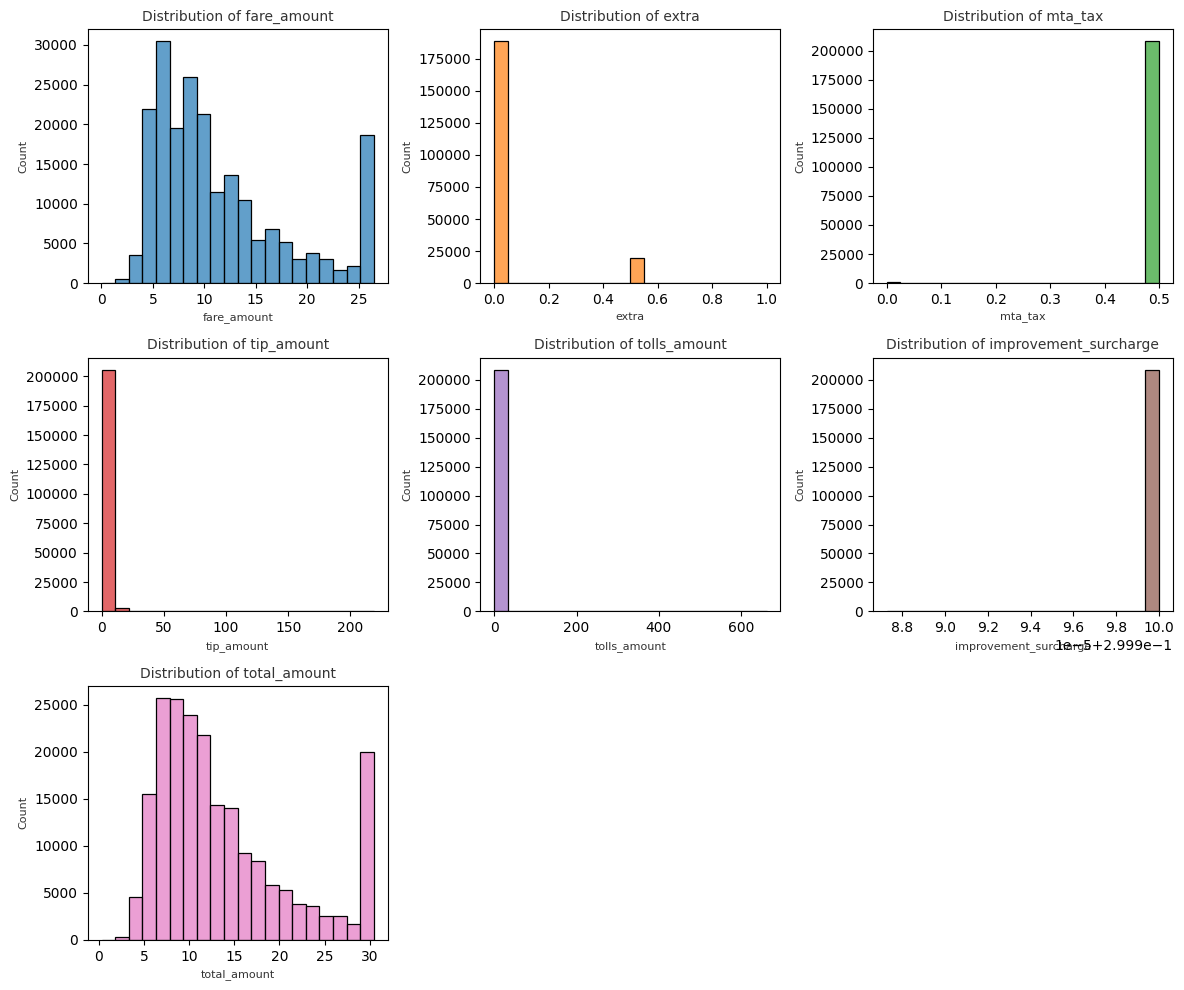

In [342]:
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Added a seventh color

plt.figure(figsize=(12, 10)) # size figure (adjusted for more plots)

# loop over each column to draw
numerical_cols = df_model2.select_dtypes(include=np.number).columns
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)  # (row, col, #plot) - Changed to 3x3 grid
    sns.histplot(df_model2[col], bins=20, color=colors[i], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()

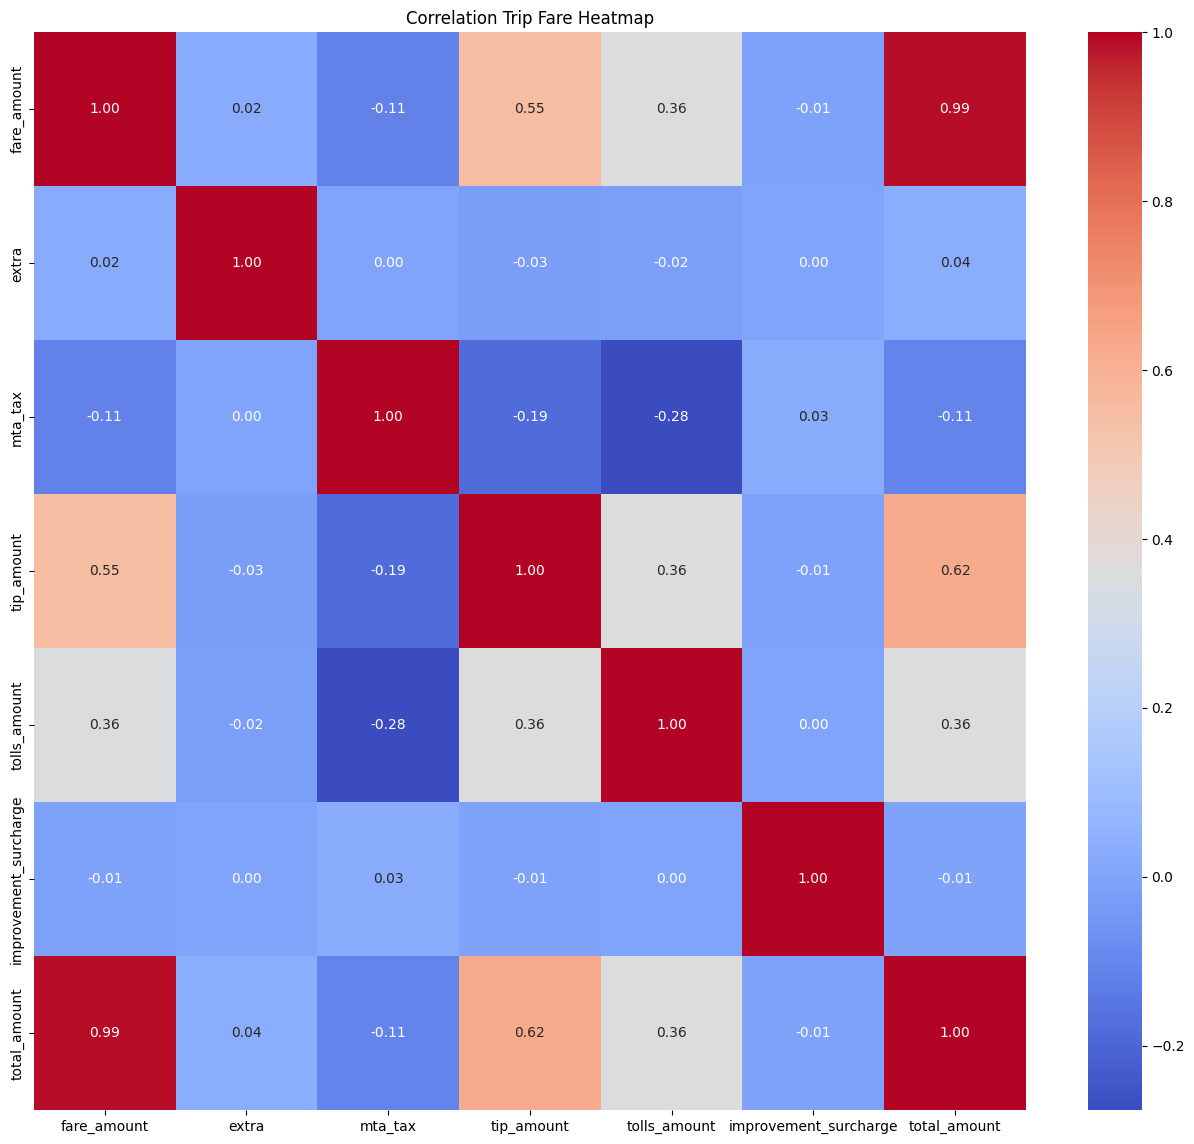

In [343]:
df_copy = df_model2.copy()


# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_copy.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()

In [344]:
df_model2

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,11.0,0.5,0.5,3.05,0.0,0.3,15.35
2,26.5,0.5,0.5,8.00,0.0,0.3,30.45
3,20.5,0.5,0.5,0.00,0.0,0.3,21.80
4,5.5,0.5,0.5,2.00,0.0,0.3,8.80
...,...,...,...,...,...,...,...
208441,16.0,0.0,0.5,3.36,0.0,0.3,20.16
208442,15.5,0.0,0.5,2.00,0.0,0.3,18.30
208443,4.0,0.0,0.5,0.00,0.0,0.3,4.80
208444,7.0,0.0,0.5,0.00,0.0,0.3,7.80


In [345]:
df_model2.to_csv("df_TotalAmount.csv",index=False)

# **Data1 train to model to predict fareAmount**

In [346]:
df_model1.columns

Index(['passenger_count', 'store_and_fwd_flag', 'payment_type',
       'trip_distance_miles', 'Duration', 'fare_amount', 'fare_per_mile',
       'duration_bin'],
      dtype='object')

In [347]:
X = df_model1.drop(columns = ['fare_amount',"duration_bin"])
y = df_model1['fare_amount']

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [349]:
X_train.columns

Index(['passenger_count', 'store_and_fwd_flag', 'payment_type',
       'trip_distance_miles', 'Duration', 'fare_per_mile'],
      dtype='object')

In [350]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['trip_distance_miles', 'Duration','fare_per_mile']] = scaler.fit_transform(X_train[['trip_distance_miles', 'Duration', 'fare_per_mile']])
X_test[['trip_distance_miles', 'Duration','fare_per_mile']] = scaler.transform(X_test[['trip_distance_miles', 'Duration', 'fare_per_mile']])

In [351]:
X_train.head()

,passenger_count,store_and_fwd_flag,payment_type,trip_distance_miles,Duration,fare_per_mile
95189,1,0,1,0.315691,1.552561,-0.031949
89183,2,0,1,-0.983154,-1.157373,0.002281
15392,5,0,0,0.239287,0.537506,-0.069388
169026,0,0,0,-1.083389,-1.202320,0.055755
8716,1,0,0,1.405616,0.593690,-0.110718


In [352]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [353]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

model_train_mae_lr, model_train_mse_lr, model_train_rmse_lr, model_train_r2_lr = evaluate_model(y_train, y_train_pred_lr)
model_test_mae_lr, model_test_mse_lr, model_test_rmse_lr, model_test_r2_lr = evaluate_model(y_test, y_test_pred_lr)

print('Linear Regression Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_lr}')
print(f'- MSE : {model_train_mse_lr}')
print(f'- RMSE : {model_train_rmse_lr}')
print(f'- R2 : {model_train_r2_lr}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_lr}')
print(f'- MSE : {model_test_mse_lr}')
print(f'- RMSE : {model_test_rmse_lr}')
print(f'- R2 : {model_test_r2_lr}')
print('='* 40)
print()

Linear Regression Model

Model Performance In Training Set
- MAE : 0.7491119537628367
- MSE : 1.729550721192186
- RMSE : 1.3151238425304994
- R2 : 0.9599340757898157
----------------------------------------
Model Performance In Test Set
- MAE : 0.7530322179744675
- MSE : 1.6869157172863956
- RMSE : 1.2988131956853517
- R2 : 0.9610289338506365



In [354]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

model_train_mae_r, model_train_mse_r, model_train_rmse_r, model_train_r2_r = evaluate_model(y_train, y_train_pred_ridge)
model_test_mae_r, model_test_mse_r, model_test_rmse_r, model_test_r2_r = evaluate_model(y_test, y_test_pred_ridge)

print('Ridge Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_r}')
print(f'- MSE : {model_train_mse_r}')
print(f'- RMSE : {model_train_rmse_r}')
print(f'- R2 : {model_train_r2_r}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_r}')
print(f'- MSE : {model_test_mse_r}')
print(f'- RMSE : {model_test_rmse_r}')
print(f'- R2 : {model_test_r2_r}')
print('='* 40)
print()

Ridge Model

Model Performance In Training Set
- MAE : 0.749108324864299
- MSE : 1.7295507218582622
- RMSE : 1.3151238427837366
- R2 : 0.9599340757743857
----------------------------------------
Model Performance In Test Set
- MAE : 0.7530284798229134
- MSE : 1.6869159183258744
- RMSE : 1.2988132730788804
- R2 : 0.9610289292062297



In [355]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

model_train_mae_l, model_train_mse_l, model_train_rmse_l, model_train_r2_l = evaluate_model(y_train, y_train_pred_lasso)
model_test_mae_l, model_test_mse_l, model_test_rmse_l, model_test_r2_l = evaluate_model(y_test, y_test_pred_lasso)

print('Lasso Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_l}')
print(f'- MSE : {model_train_mse_l}')
print(f'- RMSE : {model_train_rmse_l}')
print(f'- R2 : {model_train_r2_l}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_l}')
print(f'- MSE : {model_test_mse_l}')
print(f'- RMSE : {model_test_rmse_l}')
print(f'- R2 : {model_test_r2_l}')
print('='* 40)
print()

Lasso Model

Model Performance In Training Set
- MAE : 1.1584105268300877
- MSE : 3.2333301888337966
- RMSE : 1.7981463201958279
- R2 : 0.9250982577700763
----------------------------------------
Model Performance In Test Set
- MAE : 1.1648904114209067
- MSE : 3.270033434952516
- RMSE : 1.8083233767643763
- R2 : 0.9244558053503931



In [356]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)

model_train_mae_dt, model_train_mse_dt, model_train_rmse_dt, model_train_r2_dt = evaluate_model(y_train, y_train_pred_dt)
model_test_mae_dt, model_test_mse_dt, model_test_rmse_dt, model_test_r2_dt = evaluate_model(y_test, y_test_pred_dt)

print('DecisionTreeRegressor Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_dt}')
print(f'- MSE : {model_train_mse_dt}')
print(f'- RMSE : {model_train_rmse_dt}')
print(f'- R2 : {model_train_r2_dt}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_dt}')
print(f'- MSE : {model_test_mse_dt}')
print(f'- RMSE : {model_test_rmse_dt}')
print(f'- R2 : {model_test_r2_dt}')
print('='* 40)
print()

DecisionTreeRegressor Model

Model Performance In Training Set
- MAE : 0.0
- MSE : 0.0
- RMSE : 0.0
- R2 : 1.0
----------------------------------------
Model Performance In Test Set
- MAE : 0.05207205907112105
- MSE : 0.15545036919450658
- RMSE : 0.39427194827239054
- R2 : 0.9964087911691479



In [357]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

model_train_mae_rf, model_train_mse_rf, model_train_rmse_rf, model_train_r2_rf = evaluate_model(y_train, y_train_pred_rf)
model_test_mae_rf, model_test_mse_rf, model_test_rmse_rf, model_test_r2_rf = evaluate_model(y_test, y_test_pred_rf)

print('RandomForestRegressor Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_rf}')
print(f'- MSE : {model_train_mse_rf}')
print(f'- RMSE : {model_train_rmse_rf}')
print(f'- R2 : {model_train_r2_rf}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_rf}')
print(f'- MSE : {model_test_mse_rf}')
print(f'- RMSE : {model_test_rmse_rf}')
print(f'- R2 : {model_test_r2_rf}')
print('='* 40)
print()

RandomForestRegressor Model

Model Performance In Training Set
- MAE : 0.01671657296445736
- MSE : 0.012032022863078523
- RMSE : 0.10969057782270328
- R2 : 0.9997212720562512
----------------------------------------
Model Performance In Test Set
- MAE : 0.044159037448589414
- MSE : 0.0909799224482286
- RMSE : 0.30162878252618497
- R2 : 0.9978981851080875



In [358]:
from sklearn.ensemble import GradientBoostingRegressor

# ✅ Train Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

# Evaluate
model_train_mae_gbr, model_train_mse_gbr, model_train_rmse_gbr, model_train_r2_gbr = evaluate_model(y_train, y_train_pred_gbr)
model_test_mae_gbr, model_test_mse_gbr, model_test_rmse_gbr, model_test_r2_gbr = evaluate_model(y_test, y_test_pred_gbr)

# ✅ Print results
print('Gradient Boosting Regression Model\n')

print('Model Performance on Training Set')
print(f'- MAE  : {model_train_mae_gbr:.4f}')
print(f'- MSE  : {model_train_mse_gbr:.4f}')
print(f'- RMSE : {model_train_rmse_gbr:.4f}')
print(f'- R2   : {model_train_r2_gbr:.4f}')
print('-'*40)

print('Model Performance on Test Set')
print(f'- MAE  : {model_test_mae_gbr:.4f}')
print(f'- MSE  : {model_test_mse_gbr:.4f}')
print(f'- RMSE : {model_test_rmse_gbr:.4f}')
print(f'- R2   : {model_test_r2_gbr:.4f}')
print('='*40)


Gradient Boosting Regression Model

Model Performance on Training Set
- MAE  : 0.3163
- MSE  : 0.3215
- RMSE : 0.5670
- R2   : 0.9926
----------------------------------------
Model Performance on Test Set
- MAE  : 0.3229
- MSE  : 0.3422
- RMSE : 0.5850
- R2   : 0.9921


In [359]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ✅ Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train R2": train_r2, "Test R2": test_r2,
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train MSE": train_mse, "Test MSE": test_mse,
        "Train RMSE": train_rmse, "Test RMSE": test_rmse
    })

# ✅ Convert results into DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results)

print("Model Comparison Results:\n")
print(results_df)

# ✅ Sort by Test R2 (best model on top)
results_df = results_df.sort_values(by="Test R2", ascending=False)
results_df


Model Comparison Results:

               Model  Train R2   Test R2  Train MAE  Test MAE  Train MSE  \
0  Linear Regression  0.959934  0.961029   0.749112  0.753032   1.729551   
1   Ridge Regression  0.959934  0.961029   0.749108  0.753028   1.729551   
2   Lasso Regression  0.959927  0.961025   0.747355  0.751208   1.729836   
3      Random Forest  0.999725  0.997911   0.016784  0.043953   0.011873   
4  Gradient Boosting  0.992553  0.992094   0.316271  0.322898   0.321451   

   Test MSE  Train RMSE  Test RMSE  
0  1.686916    1.315124   1.298813  
1  1.686916    1.315124   1.298813  
2  1.687087    1.315232   1.298879  
3  0.090420    0.108964   0.300700  
4  0.342239    0.566967   0.585012  


,Model,Train R2,Test R2,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE
3,Random Forest,0.999725,0.997911,0.016784,0.043953,0.011873,0.090420,0.108964,0.300700
4,Gradient Boosting,0.992553,0.992094,0.316271,0.322898,0.321451,0.342239,0.566967,0.585012
0,Linear Regression,0.959934,0.961029,0.749112,0.753032,1.729551,1.686916,1.315124,1.298813
1,Ridge Regression,0.959934,0.961029,0.749108,0.753028,1.729551,1.686916,1.315124,1.298813
2,Lasso Regression,0.959927,0.961025,0.747355,0.751208,1.729836,1.687087,1.315232,1.298879


In [360]:
X_train.columns

Index(['passenger_count', 'store_and_fwd_flag', 'payment_type',
       'trip_distance_miles', 'Duration', 'fare_per_mile'],
      dtype='object')

In [361]:
# User input
duration = float(input("Enter trip duration (in minutes): "))
trip_distance = float(input("Enter trip distance (in miles): "))
passenger_count = int(input("Enter passenger count(1-3): "))
store_and_fwd_flag = int(input("Enter store_and_fwd_flag (e.g., 0=No, 1=Yes): "))
payment_type = int(input("Enter payment type (e.g., 0=Cash, 1=Card.): "))

# Prepare data for prediction
# Note: We need to include all features that the model was trained on, even if the user doesn't input them directly.
# For this example, we will use placeholder values for 'passenger_count', 'payment_type', 'fare_per_mile', and 'duration_bin'
# as the model was trained on these features. In a real application, you would need to handle these inputs from the user or other sources.
# Also, the 'trip_distance' and 'duration' need to be scaled using the same scaler trained on the training data.

# Create a DataFrame with the correct columns and order based on X_train
input_data = pd.DataFrame([[passenger_count,store_and_fwd_flag, payment_type, trip_distance, duration, 0.0]],
                          columns=['passenger_count','store_and_fwd_flag', 'payment_type', 'trip_distance_miles', 'Duration', 'fare_per_mile'])

# Scale the relevant numerical features using the scaler fitted on the training data
input_data[['trip_distance_miles', 'Duration', 'fare_per_mile']] = scaler.transform(input_data[['trip_distance_miles', 'Duration', 'fare_per_mile']])

# Predict the fare amount using the best performing model (RandomForestRegressor)
predicted_fare = random_forest.predict(input_data).item()

print(f"Estimated Fare Amount: ${predicted_fare:.2f}")

Enter trip duration (in minutes): 22
Enter trip distance (in miles): 12
Enter passenger count(1-3): 2
Enter store_and_fwd_flag (e.g., 0=No, 1=Yes): 1
Enter payment type (e.g., 0=Cash, 1=Card.): 1
Estimated Fare Amount: $0.93


In [362]:
# User input
passenger_count = int(input("Enter passenger count: "))
payment_type = int(input("Enter payment type (e.g., 0=Cash, 1=Card, etc.): "))
duration = float(input("Enter trip duration (in minutes): "))
trip_distance = float(input("Enter trip distance (in miles): "))

# Placeholder values for features not entered by user
fare_per_mile = 0.0       # default or placeholder
duration_bin = 0          # default or placeholder

# Prepare data for prediction
input_data = pd.DataFrame([[
    passenger_count,
    payment_type,
    trip_distance,
    duration,
    fare_per_mile,
    duration_bin
]],
    columns=['passenger_count', 'payment_type', 'trip_distance_miles', 'Duration', 'fare_per_mile', 'duration_bin']
)

# Scale numerical features
input_data[['trip_distance_miles', 'Duration', 'fare_per_mile']] = scaler.transform(
    input_data[['trip_distance_miles', 'Duration', 'fare_per_mile']]
)

# Predict fare
predicted_fare = random_forest.predict(input_data).item()

print(f"Estimated Fare Amount: ${predicted_fare:.2f}")


Enter passenger count: 2
Enter payment type (e.g., 0=Cash, 1=Card, etc.): 1
Enter trip duration (in minutes): 33
Enter trip distance (in miles): 20


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- duration_bin
Feature names seen at fit time, yet now missing:
- store_and_fwd_flag


In [363]:
import pickle

# suppose GradientBoosting is best
best_model = model   # (or best_rf, best_lasso, etc.)

# ✅ Save model
with open("FareAmount_prediction_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as FareAmount_prediction_model.pkl")

✅ Model saved as FareAmount_prediction_model.pkl


# **Data2 train to model to predict fareAmount**

In [364]:
df_model2.columns


Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [365]:
X = df_model2.drop(columns = ['total_amount'])
y = df_model2['total_amount']

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [367]:
X_train.columns

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge'],
      dtype='object')

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train[['trip_distance_miles', 'Duration','fare_per_mile']] = scaler.fit_transform(X_train[['trip_distance_miles', 'Duration', 'fare_per_mile']])
# X_test[['trip_distance_miles', 'Duration','fare_per_mile']] = scaler.transform(X_test[['trip_distance_miles', 'Duration', 'fare_per_mile']])

In [368]:
X_train.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
116907,9.5,0.0,0.5,2.06,0.0,0.3
101403,14.5,0.0,0.5,3.05,0.0,0.3
112710,8.5,0.0,0.5,1.00,0.0,0.3
12880,10.5,0.0,0.5,2.82,0.0,0.3
22221,4.5,0.0,0.5,0.00,0.0,0.3


In [369]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [370]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

model_train_mae_lr, model_train_mse_lr, model_train_rmse_lr, model_train_r2_lr = evaluate_model(y_train, y_train_pred_lr)
model_test_mae_lr, model_test_mse_lr, model_test_rmse_lr, model_test_r2_lr = evaluate_model(y_test, y_test_pred_lr)

print('Linear Regression Model')
print()
print('Model Performance In Training Set')
print(f'- MAE : {model_train_mae_lr}')
print(f'- MSE : {model_train_mse_lr}')
print(f'- RMSE : {model_train_rmse_lr}')
print(f'- R2 : {model_train_r2_lr}')
print('-'* 40)
print('Model Performance In Test Set')
print(f'- MAE : {model_test_mae_lr}')
print(f'- MSE : {model_test_mse_lr}')
print(f'- RMSE : {model_test_rmse_lr}')
print(f'- R2 : {model_test_r2_lr}')
print('='* 40)
print()

Linear Regression Model

Model Performance In Training Set
- MAE : 0.7433743409756883
- MSE : 0.9667146213696357
- RMSE : 0.9832164671981627
- R2 : 0.9825321911072981
----------------------------------------
Model Performance In Test Set
- MAE : 0.7348789153888036
- MSE : 0.9114511087361263
- RMSE : 0.9546994860877042
- R2 : 0.9832843006462612



In [371]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ✅ Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train R2": train_r2, "Test R2": test_r2,
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train MSE": train_mse, "Test MSE": test_mse,
        "Train RMSE": train_rmse, "Test RMSE": test_rmse
    })

# ✅ Convert results into DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results)

print("Model Comparison Results:\n")
print(results_df)

# ✅ Sort by Test R2 (best model on top)
results_df = results_df.sort_values(by="Test R2", ascending=False)
results_df


Model Comparison Results:

               Model  Train R2   Test R2  Train MAE  Test MAE  Train MSE  \
0  Linear Regression  0.982532  0.983284   0.743374  0.734879   0.966715   
1   Ridge Regression  0.982532  0.983288   0.743409  0.734883   0.966746   
2   Lasso Regression  0.982268  0.983106   0.748172  0.739032   0.981342   
3      Random Forest  0.999779  0.999712   0.010822  0.011723   0.012208   
4  Gradient Boosting  0.999093  0.999119   0.113107  0.112246   0.050173   

   Test MSE  Train RMSE  Test RMSE  
0  0.911451    0.983216   0.954699  
1  0.911242    0.983233   0.954590  
2  0.921158    0.990627   0.959770  
3  0.015677    0.110488   0.125209  
4  0.048053    0.223994   0.219210  


,Model,Train R2,Test R2,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE
3,Random Forest,0.999779,0.999712,0.010822,0.011723,0.012208,0.015677,0.110488,0.125209
4,Gradient Boosting,0.999093,0.999119,0.113107,0.112246,0.050173,0.048053,0.223994,0.219210
1,Ridge Regression,0.982532,0.983288,0.743409,0.734883,0.966746,0.911242,0.983233,0.954590
0,Linear Regression,0.982532,0.983284,0.743374,0.734879,0.966715,0.911451,0.983216,0.954699
2,Lasso Regression,0.982268,0.983106,0.748172,0.739032,0.981342,0.921158,0.990627,0.959770


In [372]:
X_train.columns

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge'],
      dtype='object')

In [373]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# User input
fare_amount = float(input("Enter trip Fare Amount: "))
extra = float(input("Enter extra charges: "))
mta_tax = float(input("Enter MTA tax: "))
tip_amount = float(input("Enter tip amount: "))
tolls_amount = float(input("Enter tolls amount: "))
improvement_surcharge = float(input("Enter improvement surcharge: "))

# Create a DataFrame with the correct columns and order based on X_train from df_model2
input_data = pd.DataFrame([[fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge]],
                          columns=['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge'])

# Retrain the RandomForestRegressor on the df_model2 data to ensure the correct model is used
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train) # Use X_train and y_train from the df_model2 split

# Predict the fare amount using the retrained RandomForestRegressor model
predicted_total_amount = random_forest.predict(input_data).item()

print(f"Estimated Total Amount: ${predicted_total_amount:.2f}")

Enter trip Fare Amount: 12
Enter extra charges: 0
Enter MTA tax: 0
Enter tip amount: 3
Enter tolls amount: 0
Enter improvement surcharge: 0
Estimated Total Amount: $15.80


In [ ]:
import pickle


best_model = model   # (or best_rf, best_lasso, etc.)

# ✅ Save model
with open("TotalAmount_prediction_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as TotalAmount_prediction_model.pkl")